In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train_data = pd.read_table('data.csv',sep=",",index_col=0,names=range(1,8))
train_data.head()

,1,2,3,4,5,6,7
1,2019,MAG,Medical Xpress,A,B,C,"College of Georgia, Augusta, Georgia, and Th..."
2,2019,ACAD,Journal of Shipping and Trade,A,B,C,# 0 # 0.000 # Shandong # Jinan # 2 # 0.054 #...
3,2019,ACAD,Kidney Blood Pressure Research,A,B,C,"# (a) Department of Neurology, People's Hosp..."
4,2019,ACAD,Kidney Blood Pressure Research,A,B,C,"(b) First Department of Cardiology, People's..."
5,2019,ACAD,Kidney Blood Pressure Research,A,B,C,"(c) Department of Ultrasonic Center, Northwe..."


In [103]:
#从文件导入停用词表
stpwrdpath = "stop_words.txt"
stpwrd_dic = open(stpwrdpath,encoding='utf8')
stpwrd_content = stpwrd_dic.read()
#将停用词表转换为list  
stpwrdlst = stpwrd_content.splitlines()
stpwrd_dic.close()
#print(stpwrdlst)

In [41]:

from sklearn.feature_extraction.text import TfidfVectorizer
# 加入停顿词
vector = TfidfVectorizer(stop_words=stpwrdlst)
tfidf = vector.fit_transform(train_data[7])


E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'daren', 'hadn', 'herse', 'himse', 'itse', 'mayn', 'mightn', 'mon', 'mustn', 'myse', 'needn', 'oughtn', 'shan'] not in stop_words.
  sorted(inconsistent))


In [50]:
wordlist = vector.get_feature_names()#获取词袋模型中的所有词  
# tf-idf矩阵 元素a[i][j]表示j词在i类文本中的tf-idf权重
weightlist = tfidf.toarray()  
#打印每类文本的tf-idf词语权重，第一个for遍历所有文本，第二个for便利某一类文本下的词语权重
#for i in range(len(weightlist)):  
for i in range(3):  
    print ("-------第",i,"段文本的词语tf-idf权重------")
    for j in range(len(wordlist)):  
        if weightlist[i][j]>0:
            print (wordlist[j],weightlist[i][j] )

-------第 0 段文本的词语tf-idf权重------
augusta 0.27066919987012655
bidirectional 0.27066919987012655
china 0.11207458994382831
coauthors 0.27066919987012655
college 0.24863025762149982
evidence 0.27066919987012655
fourth 0.2329933792466566
georgia 0.5413383997402531
medical 0.2329933792466566
military 0.2329933792466566
nature 0.27066919987012655
support 0.27066919987012655
university 0.16489979940026875
xi 0.054354719574902254
-------第 1 段文本的词语tf-idf权重------
000 0.2338760269128826
027 0.6249817926352242
054 0.3124908963176121
chengdu 0.25499073225260355
jinan 0.3124908963176121
shaanxi 0.19502934342277886
shandong 0.28704666838007803
sichuan 0.2689937013586776
xi 0.06275318745983523
yunnan 0.3124908963176121
-------第 2 段文本的词语tf-idf权重------
cardiology 0.2583799937914262
department 0.4492959208820867
hospital 0.4492959208820867
neurology 0.3001609161946912
people 0.38431759707342134
province 0.38431759707342134
shaanxi 0.3746681077526867
xi 0.06027712955495703


In [66]:
weightlist

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.23387603, 0.62498179, 0.3124909 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [70]:
print(wordlist[1])
weightlist[0][1]


027


0.0

In [72]:
word=np.array(wordlist)
weight=np.array(weightlist)

## 获取tf-idf大于0的词组成一个数组
### 第一段文本 ['augusta',  'bidirectional',  'china',  'coauthors',  'college',  'evidence',  'fourth',  'georgia',  'medical',  'military',  'nature',  'support', 'university',  'xi'],

In [106]:
words=[];
for i in range(len(weightlist)):  
    word=[];
    for j in range(len(wordlist)):  
        if weightlist[i][j]>0:
            #print (wordlist[j],weightlist[i][j] )
            word.append(wordlist[j]);
    words.append(word);

In [107]:
words[0]

['augusta',
 'bidirectional',
 'china',
 'coauthors',
 'college',
 'evidence',
 'fourth',
 'georgia',
 'medical',
 'military',
 'nature',
 'support',
 'university',
 'xi']

In [108]:
words[1]

['000',
 '027',
 '054',
 'chengdu',
 'jinan',
 'shaanxi',
 'shandong',
 'sichuan',
 'xi',
 'yunnan']

### 根据TF-IDF 获取 每一条数据的词，
### 组成新的数据 把这些词语进行Word2Vec 然后 进行降维 分组聚合

In [85]:
from gensim.models import Word2Vec
#common_texts=[["georgia"],["yunnan","chengdu"],["cardiology","department"]]
common_texts=words
train_model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)
#train_model.save('./MyModel')

train_model.wv.save_word2vec_format('./mymodel.txt', binary=False)

E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [95]:

from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2,learning_rate=100).fit_transform(train_model.wv[train_model.wv.index2word])


## 此图有误区，可以不用 word2vec 不知道结果怎么使用

In [99]:
import random
random_word = random.sample(train_model.wv.index2word,50)

from matplotlib.font_manager import *  
import matplotlib.pyplot as plt 
#解决负号'-'显示为方块的问题  
plt.figure(figsize=(30, 20)) 
plt.rcParams['savefig.dpi'] = 1000 #图片像素
plt.rcParams['figure.dpi'] = 800 #分辨率
myfont = FontProperties(fname='C:/Windows/Fonts/STFANGSO.TTF')

plt.scatter(X_tsne[:,0],X_tsne[:,1])
for i in range(len(X_tsne)):
    x=X_tsne[i][0]
    y=X_tsne[i][1]
    plt.text(x , y ,random_word[i], fontproperties= myfont,size = 88)

#plt.show()
#plt.figure.savefig("tsnefig", bbox_inches='tight')

plt.savefig("common_texts")

IndexError: list index out of range

In [91]:
train_model.most_similar(['music'])

E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('campus', 0.3129662871360779),
 ('influenced', 0.2705223262310028),
 ('guys', 0.24438686668872833),
 ('laboratory', 0.24095764756202698),
 ('culture', 0.23802775144577026),
 ('concrete', 0.2370348870754242),
 ('nan', 0.22768667340278625),
 ('shanghainese', 0.2245570719242096),
 ('surprised', 0.223384290933609),
 ('meaty', 0.22140833735466003)]

## 情感分析  使用csv 数据   SnowNLP 好像大部分是负向的，需要求证是否正确

In [7]:
from snownlp import SnowNLP

In [8]:
print(train_data[7].iloc[0])

??College of Georgia, Augusta, Georgia, and The Fourth Military Medical University,?Xi'an, China, with coauthors. " There is evidence to support the bidirectional nature


In [9]:
# 第一条数据的情感
text=train_data[7].iloc[0]
s = SnowNLP(text)
s.sentiments

#output : 0.14448966846220868

0.09376044024430807

[0.09376044024430807, 4.593903035754465e-11, 0.17144602564591438, 0.17144602564591438, 0.052946134564149205, 0.004902857770438529, 0.006173446161520935, 0.047920348638093135, 0.036376049724791804, 0.030936124458867953, 0.006852416482712176, 0.020279324690600342, 0.21840664297873602, 0.13118790557022608, 0.01233702542147419, 0.13118790557022608, 0.17144602564591438, 0.8399390359650478, 0.09501225574037198, 0.07541426254933747, 0.005074192400119304, 0.12118974603714516, 0.016734469799581486, 0.0863575492779024, 0.1360549402229584, 0.13605494022295506, 0.17144602564591438, 0.026460261340884528, 0.09501225574037198, 0.3830077603355847, 0.008318929786051754, 0.024229015241810092, 0.009109720840610014, 0.0030551278547963356, 0.009692981897842623, 0.14156756676256332, 0.051623508501988935, 0.14571593231755942, 0.22091695429926161, 0.024652936129934355, 0.024652936129934355, 0.1089828029100175, 0.03868248204366542, 0.052946134564149205, 0.026840149974650673, 0.03245502805148881, 0.058466645881

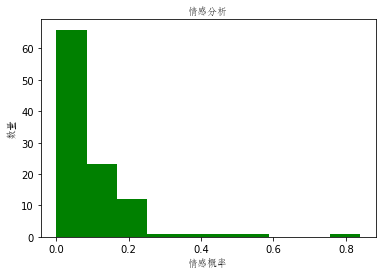

In [10]:
from snownlp import SnowNLP
from matplotlib.font_manager import FontProperties


list = train_data[7]
sentimentslist = []
for i in list:
    s = SnowNLP(i)
    sentimentslist.append(s.sentiments)
print(sentimentslist)
print(len(sentimentslist))
myfont = FontProperties(fname='C:/Windows/Fonts/STFANGSO.TTF')
plt.hist(sentimentslist, bins=10, facecolor='g')
plt.xlabel('情感概率', fontproperties= myfont)
plt.ylabel('数量', fontproperties= myfont)
plt.title('情感分析', fontproperties= myfont)
plt.show()

In [12]:

#print(sentimentslist.mean()) #把所有的情感分析结果数值做一下平均
#print(sentimentslist.median()) #中位数

#Out[68]:0.14509066130717937
#Out[69]:0.03290747545743877
#过低，明显有问题（因为对英文文本用了snownlp，snownlp针对中文效果好）

## TextBlob 英文情感分析 情感极性0.8，主观性1.0。说明一下，情感极性的变化范围是[-1, 1]，-1代表完全负面，1代表完全正面

polarity：情感积极消极在[-1,1]之间，越接近-1越消极，越接近1越积极
subjectivity：主观客观在[0,1]之间，越接近1越主观

In [2]:
import sys
sys.path

['',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow\\python35.zip',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow\\DLLs',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow\\lib',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow\\lib\\site-packages',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\win32',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\win32\\lib',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\Pythonwin',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Administrator\\.ipython']

In [3]:
import nltk

In [13]:
from textblob import  TextBlob
text = "I am happy today. I feel sad today."
blob = TextBlob(text)
blob

TextBlob("I am happy today. I feel sad today.")

In [14]:
print(blob.sentences)
print(blob.sentences[0].sentiment)

[Sentence("I am happy today."), Sentence("I feel sad today.")]
Sentiment(polarity=0.8, subjectivity=1.0)


In [21]:

list = train_data[7]
sentimentslist = []
for i in list:
    s = TextBlob(i)
    sentimentslist.append(s.sentiment)
print(sentimentslist)
print(len(sentimentslist))


[Sentiment(polarity=-0.03333333333333333, subjectivity=0.03333333333333333), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=0.25, subjectivity=0.3333333333333333), Sentiment(polarity=0.075, subjectivity=0.21666666666666667), Sentiment(polarity=-0.1, subjectivity=0.1), Sentiment(polarity=0.25, subjectivity=0.3333333333333333), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=-0.028571428571428574, subjectivity=0.14285714285714285), Sentiment(polarity=-0.025, subjectivity=0.025), Sentiment(polarity=0.25, subjectivity=1.0), Sentiment(polarity=0.125, subjectivity=0.55), Sentiment(polarity=0.0, subjectivity=0.1), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=0.5, subjectivity=0.5), Sentiment(polarity=0.07500000000000001, subjectivity=0.65), Sentiment(polarity=0.0, subjectivity=0.1), Sentiment(polarity=-0.4351851851851852, subjectivity=0.7333333333333334), Sentiment(polarity=-0.018518518518518528, subjecti

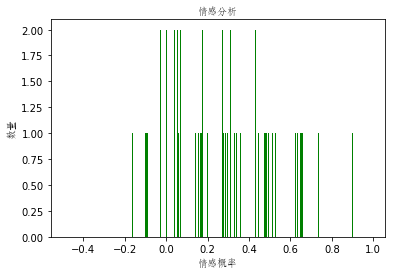

In [22]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname='C:/Windows/Fonts/STFANGSO.TTF')
plt.hist(sentimentslist, bins=10, facecolor='g')
plt.xlabel('情感概率', fontproperties= myfont)
plt.ylabel('数量', fontproperties= myfont)
plt.title('情感分析', fontproperties= myfont)
plt.show()

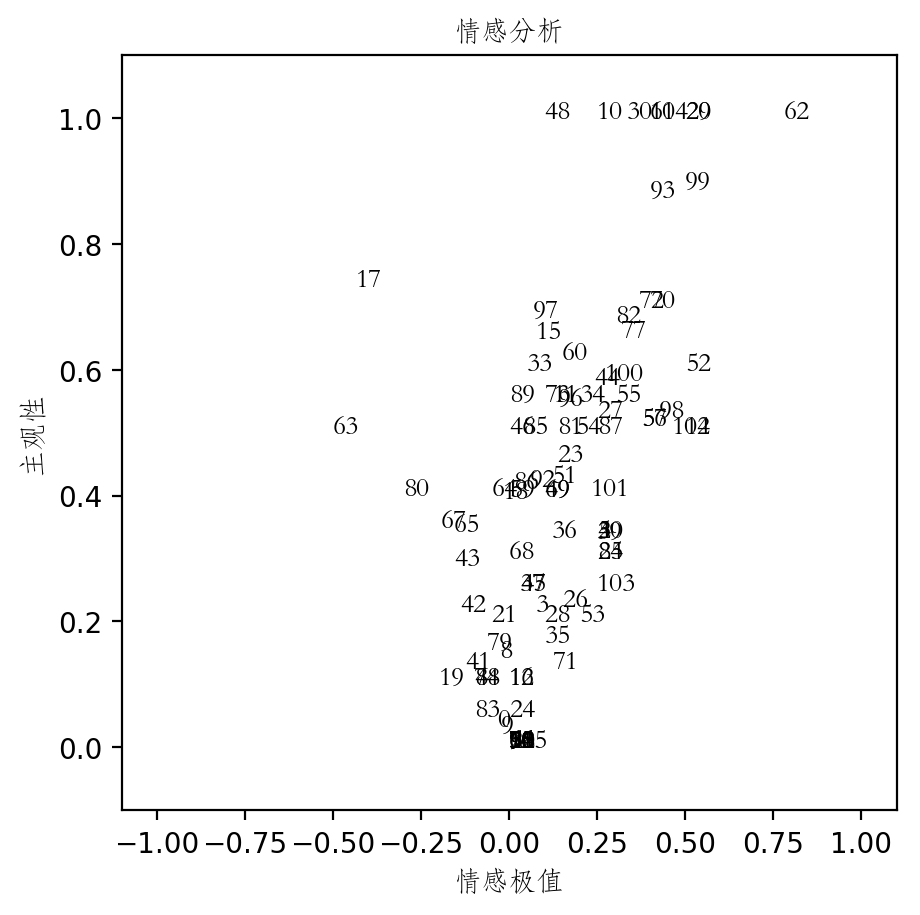

In [33]:
import matplotlib.pyplot as plt 
#解决负号'-'显示为方块的问题  
plt.figure(figsize=(5, 5)) 
plt.rcParams['savefig.dpi'] = 200 #图片像素
plt.rcParams['figure.dpi'] = 200 #分辨率
myfont = FontProperties(fname='C:/Windows/Fonts/STFANGSO.TTF')
plt.xlim((-1.1, 1.1))
plt.ylim((-0.1, 1.1))
plt.xlabel('情感极值', fontproperties= myfont)
plt.ylabel('主观性', fontproperties= myfont)
plt.title('情感分析', fontproperties= myfont)
#plt.scatter(sentimentslist[:,0],sentimentslist[:,1])
for i in range(len(sentimentslist)):
    x=sentimentslist[i][0]
    y=sentimentslist[i][1]
    plt.text(x , y,i, fontproperties= myfont,size = 20)

plt.show()
#plt.figure.savefig("tsnefig", bbox_inches='tight')

#plt.savefig("common_texts")